In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir('correlation_calc/')

['new_catboost_12_0_9218591254024251.csv',
 'new_xgb_v2_0_920247695470525.csv',
 'nn-aug-v3_0_924936552623753.csv',
 'nn-stf-v7_0_9220763307651896.csv',
 'submission_0.9233615136624729.csv',
 'submission_0.9248371482598977.csv']

In [3]:
new_names = [
    'marcus_cgb_cv_0.9218_lb_0.922',
    'marcus_xgb_cv_0.9202_lb_0.921',
    'kh_nn_aug_10_bag_cv_0.9249_lb_0.924',
    'kh_nn_cv_0.9220_lb_0.922',
    'kaz_lgb_20_bag_cv_0.9233_lb_0.923',
    'kaz_nn_20_bag_cv_0.9248_lb_0.924'
]

In [4]:
df = [pd.read_csv('correlation_calc/'+f) for f in os.listdir('correlation_calc/') if '.csv' in f]

In [5]:
df = pd.concat([df[['target']] for df in df], axis=1)
df.columns = new_names
df

,marcus_cgb_cv_0.9218_lb_0.922,marcus_xgb_cv_0.9202_lb_0.921,kh_nn_aug_10_bag_cv_0.9249_lb_0.924,kh_nn_cv_0.9220_lb_0.922,kaz_lgb_20_bag_cv_0.9233_lb_0.923,kaz_nn_20_bag_cv_0.9248_lb_0.924
0,0.077806,0.203205,0.176868,0.101985,0.334728,0.185922
1,0.229546,0.374123,0.333562,0.182050,0.573992,0.329404
2,0.160327,0.332968,0.231651,0.214021,0.646068,0.192774
3,0.150418,0.262417,0.229579,0.090694,0.572607,0.236159
4,0.082689,0.205902,0.089084,0.032917,0.344002,0.103127
5,0.003576,0.007292,0.002438,0.000875,0.015780,0.003323
6,0.003349,0.010654,0.003023,0.001528,0.016404,0.003846
7,0.068644,0.171575,0.081274,0.046580,0.287098,0.099525
8,0.002720,0.005647,0.002007,0.001094,0.008292,0.003371
9,0.007083,0.021017,0.004173,0.002314,0.037229,0.005202


In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_corr_matrix(title, data):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(data, interpolation='nearest')
    plt.title(title, size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(new_names))
    plt.xticks(tick_marks, new_names, rotation=45, ha='right')
    plt.yticks(tick_marks, new_names)

    fmt = '.3f'
    for i, j in itertools.product(range(data.shape[0]), range(data.shape[1])):
        plt.text(j, i, format(data[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if data[i, j] > 0.98 else "white")

    plt.grid(False)
    plt.tight_layout()

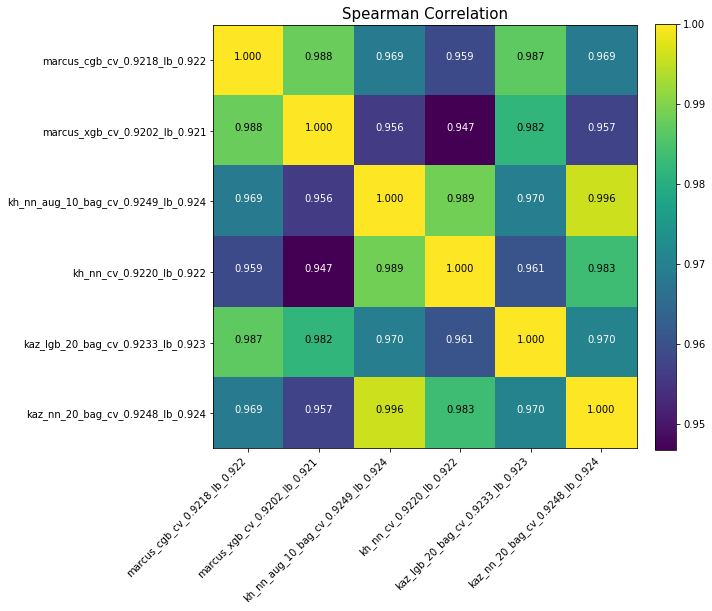

In [21]:
plot_corr_matrix('Spearman Correlation', df.corr('spearman').values)

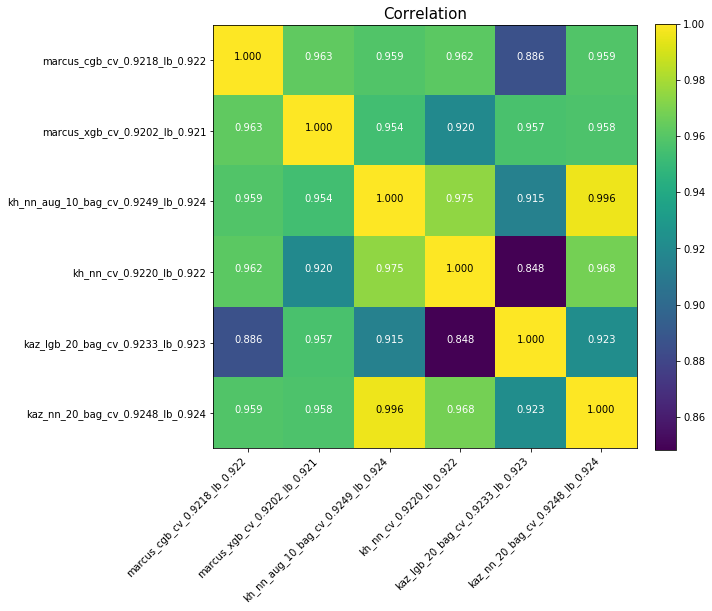

In [22]:
plot_corr_matrix('Correlation', df.corr().values)